LOGISTIC REGRESSION RESULTS
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[10  0  0]
 [ 0  9  1]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.90      0.90      0.90        10
           2       0.90      0.90      0.90        10

    accuracy                           0.93        30
   macro avg       0.93      0.93      0.93        30
weighted avg       0.93      0.93      0.93        30


KNN RESULTS (K=5)
Accuracy: 0.9333333333333333
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  2  8]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.83      1.00      0.91        10
           2       1.00      0.80      0.89        10

    accuracy                           0.93        30
   macro avg       0.94      0.93      0.93        30
weighted avg       0.94     

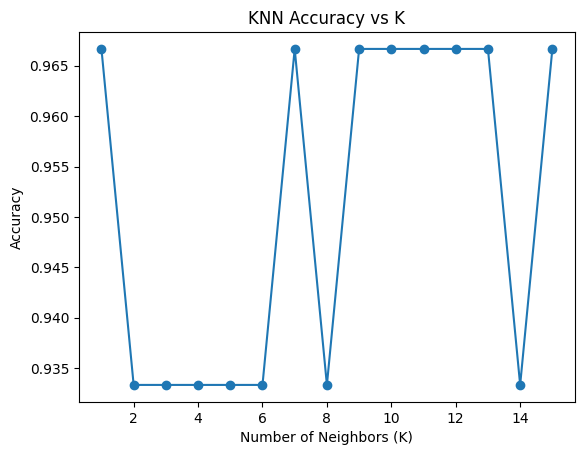


FINAL KNN RESULTS (K=7)
Accuracy: 0.9666666666666667
Confusion Matrix:
 [[10  0  0]
 [ 0 10  0]
 [ 0  1  9]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.91      1.00      0.95        10
           2       1.00      0.90      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



In [19]:
# ================================
# TASK 1: IRIS FLOWER CLASSIFICATION
# ================================

# ---------- 1. IMPORT LIBRARIES ----------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


# ---------- 2. LOAD DATASET ----------
# Upload Iris.csv to Colab before running
df = pd.read_csv("Iris.csv")

# Drop useless ID column
df.drop(columns=["Id"], inplace=True)

# ---------- 3. SPLIT FEATURES & TARGET ----------
X = df.drop(columns=["Species"])
y = df["Species"]

# Encode target labels (multiclass)
le = LabelEncoder()
y = le.fit_transform(y)

# ---------- 4. TRAIN-TEST SPLIT (STRATIFIED) ----------
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# ---------- 5. FEATURE SCALING ----------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


# ================================
# MODEL 1: LOGISTIC REGRESSION
# ================================
log_reg = LogisticRegression(max_iter=200)
log_reg.fit(X_train_scaled, y_train)

y_pred_lr = log_reg.predict(X_test_scaled)

print("LOGISTIC REGRESSION RESULTS")
print("Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))
print("Classification Report:\n", classification_report(y_test, y_pred_lr))


# ================================
# MODEL 2: KNN (BASELINE K=5)
# ================================
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("\nKNN RESULTS (K=5)")
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))


# ================================
# KNN HYPERPARAMETER TUNING
# ================================
k_values = range(1, 16)
results = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results.append((k, acc))

results_df = pd.DataFrame(results, columns=["K", "Accuracy"])
print("\nKNN Accuracy for different K values:")
print(results_df)


# ---------- 6. PLOT ACCURACY VS K ----------
plt.figure()
plt.plot(results_df["K"], results_df["Accuracy"], marker='o')
plt.xlabel("Number of Neighbors (K)")
plt.ylabel("Accuracy")
plt.title("KNN Accuracy vs K")
plt.show()


# ================================
# FINAL MODEL: BEST K (K = 7)
# ================================
best_k = 7
knn_best = KNeighborsClassifier(n_neighbors=best_k)
knn_best.fit(X_train_scaled, y_train)

y_pred_best = knn_best.predict(X_test_scaled)

print(f"\nFINAL KNN RESULTS (K={best_k})")
print("Accuracy:", accuracy_score(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))
print("Classification Report:\n", classification_report(y_test, y_pred_best))
